# Least Squares Regression

The least squares method is a mathematical technique for best line fitting. 
It minimizes the sum of the squared differences between the observed and predicted values of the dependent variable.

Mathematically, the least square method aims to find the parameters $\theta$ that minimize the sum of squared residuals (errors):

$$ \min_\theta \sum_{i=1}^{N} \left( \frac{ y_i - f(x_i,\theta)}{\sigma_i} \right)^2 $$

Here, $N$ is the number of data points, $(x_i,y_i \pm \sigma_i)$ are the  observed data points with their uncertainties, $f(x_i,\theta)$ is the model function with parameters $\theta$, and the objective is to find the best $\theta$ that minimizes this sum of squared residuals.

In [38]:
from IPython.display import HTML

# URL of curve fitting simulation
url ="https://phet.colorado.edu/sims/html/curve-fitting/latest/curve-fitting_all.html"

phet_embed_code = f"""
<iframe src="{url}"
width="600" height="400" scrolling="no" allowfullscreen></iframe>
"""

# Display the PhET simulation
display(HTML(phet_embed_code))

In [24]:
# import numpy as np
import numpy as np

# Import non-linear least squares to fit a function, f, to data.
from scipy.optimize import curve_fit

# Library to plot data
import matplotlib.pyplot as plt

In [25]:
# Define the exponentially decaying function tha will be used as a fit parameters
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

In [31]:
# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 7, 4, 2, 1])
sigma = np.array([0.4, 0.5, 0.2, 0.3, 0.6])  # Specify the sigma values

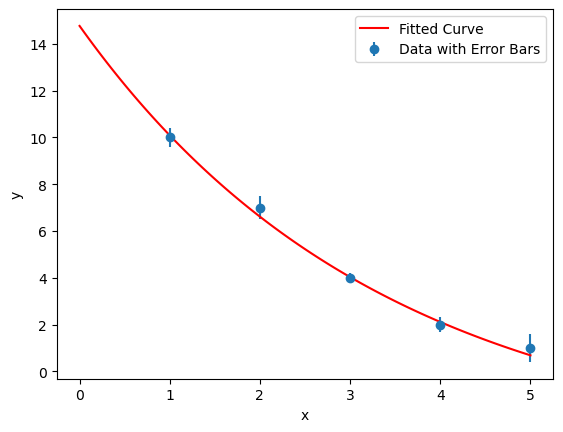

In [32]:
# Perform the weighted least squares fit
params, covariance = curve_fit(exp_decay, x, y, sigma=sigma, absolute_sigma=True)

# Extract the optimized parameters
a_opt, b_opt, c_opt = params

# Calculate the standard deviation of the parameters
a_std_dev, b_std_dev, c_std_dev = np.sqrt(np.diag(covariance))

# Plot the original data and the fitted curve
plt.errorbar(x, y, yerr=sigma, fmt='o', label='Data with Error Bars')
x_fit = np.linspace(0, max(x), 100)
y_fit = exp_decay(x_fit, a_opt, b_opt, c_opt)
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [33]:
# Display the optimized parameters and their standard deviations
print("Optimized parameters:")
print(f"a = {a_opt} ± {a_std_dev}")
print(f"b = {b_opt} ± {b_std_dev}")
print(f"c = {c_opt} ± {c_std_dev}")

Optimized parameters:
a = 18.21149082811296 ± 1.9508266738023665
b = 0.2970291170573071 ± 0.09402973793385196
c = -3.4429753540819816 ± 2.7247546379935166
